# Finding a new home: workflow

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Selling-your-home" data-toc-modified-id="Selling-your-home-1">Selling your home</a></span>
          <ul class="toc-item">
            <li><span><a href="#Determine-an-appropriate-selling-price" data-toc-modified-id="Determine-an-appropriate-selling-price-1.1">Determine an appropriate selling price</a></span></li>
            <li><span><a href="#Get-additional-information-about-the-local-real-estate-market" data-toc-modified-id="Get-additional-information-about-the-local-real-estate-market-1.2">Get additional information about the local real estate market</a></span></li>
          </ul>
        </li>
        <li><span><a href="#House-Hunting" data-toc-modified-id="House-Hunting-2">House Hunting</a></span>
          <ul class="toc-item">
            <li><span><a href="#Find-all-ZIP-Codes-within-a-specified-drive-time-of-important-places" data-toc-modified-id="Find-all-ZIP-Codes-within-a-specified-drive-time-of-important-places-2.1">Find all ZIP Codes within a specified drive time of important places</a></span></li>
            <li><span><a href="#Map-market-health,-home-values,-and-projected-appreciation" data-toc-modified-id="Map-market-health,-home-values,-and-projected-appreciation-2.2">Map market health, home values, and projected appreciation</a></span></li>
            <li><span><a href="#Find-the-best-cities-to-begin-house-hunting" data-toc-modified-id="Find-the-best-cities-to-begin-house-hunting-2.3">Find the best cities to begin house hunting</a></span></li>   
          </ul>
        </li>
    </ul>
</div>

<font color="red">Workflow using arcGIS python API</font>

This workflow guides you through the process of downloading <a href="https://www.zillow.com/research/data/">Zillow data</a> for your current home (or for a hypothetical home) and determining an appropriate selling price. It then steps through the process of identifying candidate neighborhoods where you might want to buy a new home.


## Selling your home

## Determine an appropriate selling price

1) Download home sales time series data from Zillow at <a href="www.zillow.com/research/data">www.zillow.com/research/data</a>.
> Mark and Lisa have a 3-bedroom home, so they will select the **ZHVI 3-Bedroom time-series ($) ** data set at the ZIP Code level. Select the file that best reflects your own home. If you don't own a home, pretend you do, or use Mark and Lisa's scenario to complete this workflow.

2) Prepare the Excel data as follows:

> a) Using Excel, open the **.csv** file you downloaded.

> Notice that the **RegionName** field has ZIP Codes as numbers (if you sort the **RegionName** field you will notice the ZIP Codes for Massachusetts, for example, don't have leading zeros; 01001 is 1001). Also, notice the median home value columns are named using the year and month. The first data available is for April 1996 (**1996-04**). When this workflow was created, the most current data provided was **2017-06**. The data you download will likely be more current.

> b) Copy all the column headings and the one record with data for your ZIP Code to a new Excel sheet.

Apply a filter to the **RegionName** field and select your ZIP Code. Mark and Lisa live in Crestline, California, so they apply a filter for the 92325 ZIP Code.

![](images/1.png)

> c) Select (highlight) fields starting with the month and year when you bought your home and continuing to the last month and year column in the Excel table. So, for example, since Mark and Lisa bought their home in December 2005, they highlight the the two rows from column **2007-01** to column **2018-08** (your data will likely be more current; be sure to include all the most current data for your ZIP Code).

> d) Copy (press Ctrl+C) the selected data and paste it, along with the column headings, to a new Excel sheet using **Paste Transposed** (right-click in the first cell of the new sheet to see the paste options; select **Paste Transposed**).
This gives you two columns of data.

> e) The first column has date values but only includes the year and month. In column **C**, create a proper date field.

> * Right-click column C and format the cells to be category **Date**.
> * In the first cell of column C, enter the following formula: **= DATEVALUE(CONCATENATE(A1, "-01"))**
> * Drag the <a href="https://support.office.com/en-us/article/Fill-data-automatically-in-worksheet-cells-74e31bdd-d993-45da-aa82-35a236c5b5db">Autofill handle</a> down to the last data cell in the column.


> f) Insert a top row and type the column headings:

> **YYYYMM, Value, and date**.

![](images/data1.png)

> g) Rename the Excel sheet (probably called Sheet2 at present) something like <MyCity>AveSellingPrice and delete the other sheets (the first sheet contains a large amount of data that you won't be using further in the workflow).
    
> Mark and Lisa named their price Excel sheet **CrestlineAveSellingPrice**.

> h) Save this new sheet as an Excel workbook.

> Mark and Lisa named their Excel file **Crestline3BdrmAveSellingPrice.xlsx**.

3) Connect your ArcGIS online organization.

In [1]:
from arcgis.gis import GIS

In [2]:
gis = GIS("https://deldev.maps.arcgis.com", "demos_deldev", "DelDevs12")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

4) Load the excel file for analysis.

In [4]:
file_name1 = 'Crestline3BdrmAveSellingPrice.xlsx' 
data1 = pd.read_excel(file_name1)

In [5]:
data1.head()

,YYYYMM,value,date
0,2007-01,291000,2007-01-01
1,2007-02,289000,2007-02-01
2,2007-03,287400,2007-03-01
3,2007-04,286100,2007-04-01
4,2007-05,284000,2007-05-01


In [6]:
data1.tail()

,YYYYMM,value,date
135,2018-04,252200,2018-04-01
136,2018-05,254000,2018-05-01
137,2018-06,254800,2018-06-01
138,2018-07,254900,2018-07-01
139,2018-08,254900,2018-08-01


In [7]:
data1.shape

(140, 3)

In [8]:
data1[['year','month','day']] = data1.date.apply(lambda x: pd.Series(
    x.strftime("%Y,%m,%d").split(","))) # split date into year, month, day

In [9]:
data1.head()

,YYYYMM,value,date,year,month,day
0,2007-01,291000,2007-01-01,2007,01,01
1,2007-02,289000,2007-02-01,2007,02,01
2,2007-03,287400,2007-03-01,2007,03,01
3,2007-04,286100,2007-04-01,2007,04,01
4,2007-05,284000,2007-05-01,2007,05,01


In [10]:
grpby_data1 = data1.groupby(['year']).mean()

In [11]:
type(grpby_data1)

pandas.core.frame.DataFrame

5) Creatinng a graph showing you how average home prices have changed since you bought your home.

In [12]:
grpby_data1.reset_index(inplace=True)

In [13]:
grpby_data1.head()

,year,value
0,2007,276616.666667
1,2008,221875.000000
2,2009,188391.666667
3,2010,176216.666667
4,2011,154766.666667


In [14]:
grpby_data1.value

0     276616.666667
1     221875.000000
2     188391.666667
3     176216.666667
4     154766.666667
5     145158.333333
6     163741.666667
7     183975.000000
8     197133.333333
9     229566.666667
10    235966.666667
11    252025.000000
Name: value, dtype: float64

In [15]:
grpby_data1.year

0     2007
1     2008
2     2009
3     2010
4     2011
5     2012
6     2013
7     2014
8     2015
9     2016
10    2017
11    2018
Name: year, dtype: object

Text(0,0.5,'average house price')

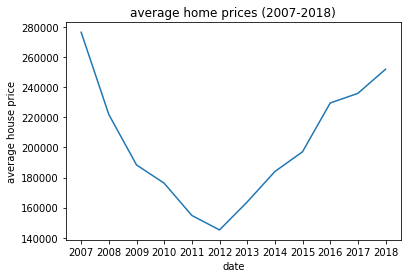

In [16]:
plt.plot(grpby_data1.year, grpby_data1.value)
plt.title("average home prices (2007-2018)")
plt.xlabel("date")
plt.ylabel("average house price")

7) Determine an appropriate selling price based on home sales trends as follows:

> a) Determine the current average selling price and the average selling price when you bought your home.Divide the current average price by the beginning average price to see how much homes in your ZIP Code have appreciated or depreciated. When Mark and Lisa bought their home in December of 2007, 3-bedroom homes were selling for $276,617. They divide 252,025 by 276,617 and get .

In [17]:
price_initial = grpby_data1.iloc[0]

In [18]:
price_initial

year       2007
value    276617
Name: 0, dtype: object

In [19]:
price_current = grpby_data1.iloc[-1]

In [20]:
price_current

year       2018
value    252025
Name: 11, dtype: object

In [21]:
house_worth = price_current.value / price_initial.value

In [22]:
house_worth

0.9110983912755316

 It seems that homes in Crestline are only worth 91 percent of what they were at the end of 2007.

> b) You can get a rough estimate of what your home is worth by summing what you paid for your home plus what you invested in it, and multiplying that sum by the ratio computed above. Mark and Lisa, for example, paid $291,000 in 2007 and invested $100,000 in solid improvements (new kitchen, major landscaping, hardwood flooring, and so on). Multiplying ($	291,000 + $100,000) by 0.91 gives them a rough suggested selling price of $343,134.

In [23]:
(price_initial.value + 100000)*house_worth

343134.83912755316

## Get additional information about the local real estate market

If your home is part of a seller's market, you are more likely to get your asking price.

1) Download the Buyer-Seller Index data at the ZIP Code level from www.zillow.com/research/data. In **Home Listings and Sales** select data type as seller-buyer index and geography as zip codes.

2) Open the **.csv** file using Excel. Zillow reports ZIP Codes as numbers. You will need to pad the ZIP Code numbers with leading zeros so the Zillow data will link to the ArcGIS ZIP Code geometry.

Follow these steps:
> a) Sort the RegionName column from smallest to largest so you will be able to see how the formula below works.

> b) Name a new column in the Excel table zipstring.

> c) In the first cell of the new column, enter the formula to pad each RegionName value with leading zeros, keeping the rightmost five characters: =RIGHT(CONCAT("00000",B2),5)

> d) Drag the Autofill handle down to the last data cell in the column.

![](images/3.png)

![](images/data2.PNG)

3) Load the excel file for analysis

In [24]:
file_name2 = 'BuyerSellerIndex.xlsx'
data2 = pd.read_excel(file_name2)

In [25]:
data2.head()

,RegionType,RegionName,State,CBSA Title,SizeRankCity,SizeRankMetro,PctPriceCut,DaysOnMarket,BuyerSellerIndex,BuyerSellerIndexMetro,zipstring
0,Zip,1001,MA,"Springfield, MA",8273,83,22.916667,81.0,6.190476,9.185083,1001
1,Zip,1002,MA,"Springfield, MA",6684,83,29.787234,94.0,10.000000,9.185083,1002
2,Zip,1007,MA,"Springfield, MA",9088,83,16.091954,83.0,2.857143,9.185083,1007
3,Zip,1013,MA,"Springfield, MA",7061,83,31.147541,76.5,8.333333,9.185083,1013
4,Zip,1020,MA,"Springfield, MA",5172,83,25.000000,73.0,3.809524,9.185083,1020


In [26]:
data2.dtypes

RegionType                object
RegionName                 int64
State                     object
CBSA Title                object
SizeRankCity               int64
SizeRankMetro              int64
PctPriceCut              float64
DaysOnMarket             float64
BuyerSellerIndex         float64
BuyerSellerIndexMetro    float64
zipstring                  int64
dtype: object

In [27]:
data2.columns

Index(['RegionType', 'RegionName', 'State', 'CBSA Title', 'SizeRankCity',
       'SizeRankMetro', 'PctPriceCut', 'DaysOnMarket', 'BuyerSellerIndex',
       'BuyerSellerIndexMetro', 'zipstring'],
      dtype='object')

4) Select **BuyerSellerIndex, DaysOnMarket, zipstring** fields

In [28]:
cols = ['BuyerSellerIndex', 'DaysOnMarket', 'zipstring']

In [29]:
slctd_data2 = data2[cols]

5) explore the data values as follows:
> a) Sort on the DaysOnMarket field and notice the range. For the data Mark and Lisa downloaded, the range is 35 to 294.5 days.

In [30]:
sorted_DaysOnMarket_df = slctd_data2.sort_values(by='DaysOnMarket', axis=0)

In [31]:
sorted_DaysOnMarket_df.DaysOnMarket.min()

35.0

In [32]:
sorted_DaysOnMarket_df.DaysOnMarket.max()

294.5

In [33]:
sorted_DaysOnMarket_df.head()

,BuyerSellerIndex,DaysOnMarket,zipstring
7420,1.120000,35.0,98107
7434,4.960000,35.0,98136
7097,0.526316,35.0,94022
7426,0.640000,35.0,98117
7399,0.080000,35.0,98043


In [34]:
sorted_DaysOnMarket_df.tail()

,BuyerSellerIndex,DaysOnMarket,zipstring
800,9.006849,252.0,8752
1177,10.000000,254.0,12428
1141,8.938356,261.5,11963
1189,9.160959,288.0,12545
753,6.000000,294.5,8403


> b) Sort on the BuyerSellerIndex field and notice the range of values. ZIP Codes with index values near 0 are part of a strong seller's market; ZIP Codes with index values near 10 are part of a strong buyer's market.

In [35]:
sort_BuyerSellerIndex_df = data2.sort_values(by='BuyerSellerIndex', axis=0)

In [36]:
sort_BuyerSellerIndex_df.head()

,RegionType,RegionName,State,CBSA Title,SizeRankCity,SizeRankMetro,PctPriceCut,DaysOnMarket,BuyerSellerIndex,BuyerSellerIndexMetro,zipstring
517,Zip,7063,NJ,"New York-Newark-Jersey City, NY-NJ-PA",10423,1,4.687500,90.0,0.017123,9.585635,7063
4546,Zip,53168,WI,"Chicago-Naperville-Elgin, IL-IN-WI",10505,3,9.756098,59.5,0.033223,9.488950,53168
485,Zip,7004,NJ,"New York-Newark-Jersey City, NY-NJ-PA",10846,1,7.894737,92.0,0.034247,9.585635,7004
6572,Zip,90025,CA,"Los Angeles-Long Beach-Anaheim, CA",2122,2,6.451613,46.0,0.036364,4.185083,90025
1609,Zip,19152,PA,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",4927,5,6.818182,67.0,0.041667,9.150552,19152


In [37]:
sort_BuyerSellerIndex_df.tail()

,RegionType,RegionName,State,CBSA Title,SizeRankCity,SizeRankMetro,PctPriceCut,DaysOnMarket,BuyerSellerIndex,BuyerSellerIndexMetro,zipstring
6091,Zip,80016,CO,"Denver-Aurora-Lakewood, CO",2658,21,27.226891,62.0,10.0,4.502762,80016
4598,Zip,53954,WI,"Madison, WI",10773,87,21.875000,75.5,10.0,3.522099,53954
262,Zip,3049,NH,"Manchester-Nashua, NH",10693,131,28.787879,74.0,10.0,3.577348,3049
7321,Zip,97209,OR,"Portland-Vancouver-Hillsboro, OR-WA",4742,23,26.258993,78.5,10.0,5.096685,97209
1224,Zip,13104,NY,"Syracuse, NY",8916,79,28.323699,89.0,10.0,9.033149,13104


In [38]:
sort_BuyerSellerIndex_df.BuyerSellerIndex.min()

0.017123288

In [39]:
sort_BuyerSellerIndex_df.BuyerSellerIndex.max()

10.0

> c) Filter the data to only show your home's ZIP code

In [40]:
slctd_data2[slctd_data2['zipstring'] == 92325]

,BuyerSellerIndex,DaysOnMarket,zipstring
6888,9.622642,79.0,92325


Notice the average number of days you can expect it will take for your home to sell.Determine if your home is part of a buyer's or seller's market. Mark and Lisa learn that their home is part of a buyer's market (9.6), and they can expect their home to be on the market approximately 79 days before it sells.

In [41]:
slctd_data2.rename(columns={"zipstring": "ZIP_CODE"}, inplace=True)

C:\Users\priyanka\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [42]:
slctd_data2.shape

(7548, 3)

In [43]:
slctd_data2.dtypes

BuyerSellerIndex    float64
DaysOnMarket        float64
ZIP_CODE              int64
dtype: object

In [44]:
slctd_data2 = slctd_data2.astype({"ZIP_CODE": int})

In [45]:
slctd_data2.dtypes

BuyerSellerIndex    float64
DaysOnMarket        float64
ZIP_CODE              int32
dtype: object

6) Search for the **United States ZIP Code Boundaries 2017** layer. You can specify the owner's name to get more specific results. To search for content from the Living Atlas, or content shared by other users on ArcGIS Online, set outside_org=True

In [46]:
items = gis.content.search('United States ZIP Code Boundaries 2017', outside_org=True)

Display the list of results.

<Item title:"2017 Tapestry Segmentation in the United States" type:Web Map owner:esri>
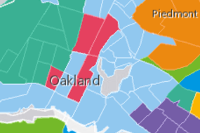

<Item title:"United States ZIP Code Boundaries 2017" type:Feature Layer Collection owner:esri_dm>
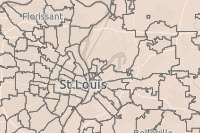

<Item title:"USA ZIP Code Areas" type:Layer Package owner:esri_dm>
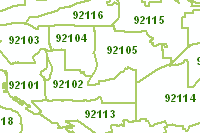

<Item title:"2017 Median Household Income in the United States" type:Web Map owner:esri>
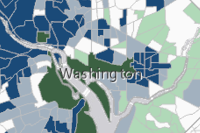

<Item title:"HbA1c Greater Lowell 2017" type:Web Map owner:hzwerling>
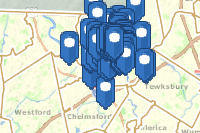

<Item title:"Wealthiest ZIP Codes in California" type:Web Map owner:UOdocent>
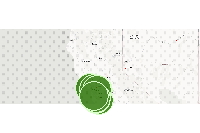

<Item title:"AmerenOutageZip180629_1210" type:Feature Layer Collection owner:WKJenkins_METROSTL>

<Item title:"Wealthiest Zip Codes 2017" type:Feature Layer Collection owner:esri_demographics>
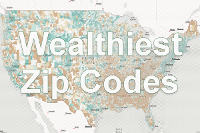

<Item title:"Enriched_United_States_ZIP_Code_Boundaries_2017" type:Feature Layer Collection owner:gtudisco454>
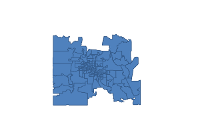

<Item title:"2017 USA Average Household Size" type:Map Image Layer owner:esri>
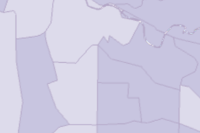

In [47]:
from IPython.display import display

for item in items:
    display(item)

Select the desired item from the list.

In [48]:
us_zip = items[1]

<Item title:"United States ZIP Code Boundaries 2017" type:Feature Layer Collection owner:esri_dm>
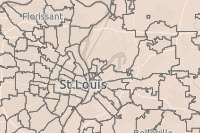

In [49]:
us_zip

Get the layer names from the item

In [50]:
for lyr in us_zip.layers:
    print(lyr.properties.name)

USA_Country
USA_State
USA_County
USA_ZipCode
USA_Tract
USA_BlockGroup


7) You want to merge the zip_code layer with data2 to visualize the result on the map

In [51]:
us_zip_lyr = us_zip.layers[3]

In [52]:
us_zip_lyr

<FeatureLayer url:"https://services.arcgis.com/P3ePLMYs2RVChkJx/arcgis/rest/services/USA_Boundaries_2017/FeatureServer/3">

In [54]:
zip_df = pd.DataFrame.spatial.from_layer(us_zip_lyr)

In [55]:
zip_df.head()

,OBJECTID,POPULATION,PO_NAME,SHAPE,SQMI,STATE,Shape__Area,Shape__Length,ZIP_CODE
0,178,-99,Puerto Real,"{""rings"": [[[-65.6266549999283, 18.33133500021...",0.36,PR,0.000079,0.045943,00740
1,208,-99,San Juan,"{""rings"": [[[-66.0720289997385, 18.44898199991...",0.51,PR,0.000113,0.072860,00909
2,209,-99,San Juan,"{""rings"": [[[-66.0631219999803, 18.45542900044...",0.41,PR,0.000090,0.042467,00911
3,210,-99,San Juan,"{""rings"": [[[-66.052898999789, 18.446785000227...",0.35,PR,0.000078,0.052902,00912
4,211,-99,San Juan,"{""rings"": [[[-66.0382759999374, 18.45309599988...",0.39,PR,0.000086,0.046390,00913


In [56]:
zip_df.shape

(30924, 9)

In [57]:
zip_df.dtypes

OBJECTID            int64
POPULATION          int64
PO_NAME            object
SHAPE            geometry
SQMI              float64
STATE              object
Shape__Area       float64
Shape__Length     float64
ZIP_CODE           object
dtype: object

In [58]:
zip_df = zip_df.astype({"ZIP_CODE": int})

In [59]:
zip_df.dtypes

OBJECTID            int64
POPULATION          int64
PO_NAME            object
SHAPE            geometry
SQMI              float64
STATE              object
Shape__Area       float64
Shape__Length     float64
ZIP_CODE            int32
dtype: object

In [60]:
merged_df = pd.merge(zip_df, slctd_data2, on='ZIP_CODE')

In [61]:
merged_df

,OBJECTID,POPULATION,PO_NAME,SHAPE,SQMI,STATE,Shape__Area,Shape__Length,ZIP_CODE,BuyerSellerIndex,DaysOnMarket
0,2456,12455,Trenton,"{'rings': [[[-74.7233979997179, 40.22921699996...",0.84,NJ,0.000231,0.076210,8629,6.470588,130.0
1,2542,27090,New York,"{'rings': [[[-74.0010520003495, 40.75707400026...",0.65,NY,0.000178,0.072050,10001,9.212329,165.0
2,2544,57216,New York,"{'rings': [[[-73.9897530000009, 40.73915600044...",0.56,NY,0.000155,0.059765,10003,5.924658,118.5
3,2546,7393,New York,"{'rings': [[[-74.0094065996348, 40.70859879999...",0.07,NY,0.000019,0.021747,10005,5.856164,207.0
4,2550,29545,New York,"{'rings': [[[-73.9914120000637, 40.74479599973...",0.35,NY,0.000096,0.069161,10010,1.712329,121.0
5,2552,25320,New York,"{'rings': [[[-73.9918769999236, 40.72642499971...",0.32,NY,0.000088,0.045895,10012,8.544521,147.0
6,2554,31849,New York,"{'rings': [[[-74.0082101002159, 40.74212730023...",0.87,NY,0.000241,0.081262,10014,9.178082,155.0
7,2555,58179,New York,"{'rings': [[[-73.9818240003773, 40.75221199998...",0.55,NY,0.000151,0.056542,10016,8.613014,161.5
8,2556,16475,New York,"{'rings': [[[-73.9776450001166, 40.75790800005...",0.34,NY,0.000095,0.046537,10017,9.863014,172.0
9,2560,45429,New York,"{'rings': [[[-73.9651569997957, 40.77503200012...",0.36,NY,0.000098,0.052537,10021,6.404110,142.0


In [62]:
merged_df.shape

(7547, 11)

In [63]:
merged_df.spatial.set_geometry('SHAPE')

In [64]:
mergd_lyr = gis.content.import_data(merged_df)

In [65]:
mergd_lyr.share(everyone=True)

{'itemId': 'b9c877a73328476a8c29ff31682d5fe5', 'notSharedWith': []}

In [66]:
mergd_lyr

<Item title:"4bf1969f53624eff963234897db53e62" type:Feature Layer Collection owner:demos_deldev>

8) Create a map of the BuyerSellerIndex field using the following steps:

In [67]:
m1 = gis.map('United States')
m1

MapView(layout=Layout(height='400px', width='100%'))

![](images/buyersellerindex_map.PNG)

In [68]:
m1.add_layer(mergd_lyr, {"renderer":"ClassedColorRenderer",
                         "field_name":"BuyerSelle",
                         "opacity":0.7
              })

9) Create a map on DaysOnMarket field as follows:

In [69]:
m2 = gis.map('Redlands, CA')
m2

MapView(layout=Layout(height='400px', width='100%'))

![](images/DaysOnMarket.PNG)

In [70]:
m2.add_layer(mergd_lyr, {"renderer":"ClassedSizeRenderer",
                         "field_name":"DaysOnMark",
                         "opacity":0.7
              })

## House Hunting

## Find all ZIP Codes within a specified drive time of important places


1) Create an Excel table with columns for **Street, City, State**, and **Zip**. Add addresses for the locations you want to access from your new home. Mark and Lisa's table below has their current job addresses. They named their Excel file **ImportantPlaces.xlsx** and the Excel sheet **WorkLocations**.

![](insights_excel_img/data3.png)

2) Load the excel file for analysis

In [71]:
file_name3 = 'ImportantPlaces.xlsx'
data3 = pd.read_excel(file_name3)

In [72]:
data3.head()

,Place,Street,City,State,Zip
0,Lisa's job,380 New York Street,Redlands,CA,92373
1,Mark's job,4511 E Guasti Road,Ontario,CA,91761


In [73]:
data3['Address'] = data3['Street'] + ' ' + data3['City'] + ' ' + data3['State']

In [74]:
data3['Address']

0    380 New York Street Redlands CA
1      4511 E Guasti Road Ontario CA
Name: Address, dtype: object

3) Draw the address on map

In [75]:
m3 = gis.map('Redlands, CA')
m3

MapView(layout=Layout(height='400px', width='100%'))

![](images/Imp_places.PNG)

In [86]:
from arcgis.geocoding import geocode
data3_addr1 = geocode(data3.Address[0])[0]
popup = { 
    "title" : "Lisa's job", 
    "content" : data3_addr['address']
    }
m3.draw(data3_addr['location'], popup,
        symbol = {"angle":0,"xoffset":0,"yoffset":0,
                  "type":"esriPMS", "url":"https://static.arcgis.com/images/Symbols/PeoplePlaces/School.png",
                  "contentType":"image/png","width":24,"height":24})

In [87]:
from arcgis.geocoding import geocode
data3_addr2 = geocode(data3.Address[1])[0]
popup = { 
    "title" : "Mark's job", 
    "content" : data3_addr['address']
    }
m3.draw(data3_addr['location'], popup,
        symbol = {"angle":0,"xoffset":0,"yoffset":0,
                  "type":"esriPMS", "url":"https://static.arcgis.com/images/Symbols/PeoplePlaces/School.png",
                  "contentType":"image/png","width":24,"height":24})

4) Create buffer and enter the maximum time you are willing to spend commuting from a new home to your important places.

In [78]:
from arcgis.geoenrichment import BufferStudyArea, enrich

In [79]:
marks = BufferStudyArea(area='4511 E Guasti Road, Ontario, CA 91761', 
                           radii=[45], units='Minutes', 
                           travel_mode='Driving')
lisas = BufferStudyArea(area='380 New York St Redlands CA 92373', 
                           radii=[45], units='Minutes', 
                           travel_mode='Driving')

drive_time_df = enrich(study_areas=[marks, lisas], data_collections=['Age'])

In [80]:
drive_time_lyr = gis.content.import_data(drive_time_df)

In [81]:
drive_time_lyr

<Item title:"91462f674dec40c6989aa59917cdde78" type:Feature Layer Collection owner:demos_deldev>

5) Select the Dissolve buffer style to merge overlapping polygons.

In [82]:
from arcgis.features.manage_data import dissolve_boundaries

In [83]:
diss_lyr = dissolve_boundaries(drive_time_lyr)

In [84]:
m_3 = gis.map('United States')
m_3

MapView(layout=Layout(height='400px', width='100%'))

![](images/buffer.PNG)

In [85]:
m_3.add_layer(diss_lyr)

In [88]:
m_3.draw(data3_addr1['location'], popup,
        symbol = {"angle":0,"xoffset":0,"yoffset":0,
                  "type":"esriPMS", "url":"https://static.arcgis.com/images/Symbols/PeoplePlaces/School.png",
                  "contentType":"image/png","width":24,"height":24})
m_3.draw(data3_addr2['location'], popup,
        symbol = {"angle":0,"xoffset":0,"yoffset":0,
                  "type":"esriPMS", "url":"https://static.arcgis.com/images/Symbols/PeoplePlaces/School.png",
                  "contentType":"image/png","width":24,"height":24})

## Map market health, home values, and projected appreciation

1) Download and prepare the Excel Market Health data as follows:

> a) From <a href="https://www.zillow.com/research/data/">www.zillow.com/reserach/data</a>, download ZIP Code level Market Health Index data.

> b) Open the .csv file using Excel and add the ZIPString column as a text field. Compute the values using =RIGHT(CONCAT("00000",B2),5). Drag the Autofill handle down to the last cell in the column to create text formatted ZIP Code values with leading zeros.

> c) Save the file as an Excel workbook. Close Excel.

> Mark and Lisa named their file MarketHealth.xlsx.

2) Load th excel file for analysis.

In [89]:
file_name4 = 'MarketHealthIndex.xlsx'
data4 = pd.read_excel(file_name4)

In [90]:
data4

,RegionType,RegionName,City,State,Metro,CBSATitle,SizeRank,MarketHealthIndex,SellForGain,PrevForeclosed,...,ZHVI,MoM,YoY,ForecastYoYPctChange,StockOfREOs,NegativeEquity,Delinquency,DaysOnMarket,Unnamed: 19,zipstring
0,Zip,1001,Agawam,MA,"Springfield, MA, MA","Springfield, MA",NaN,1.622365,75.00,0.0500,...,214000.0,0.281162,5.263158,0.047047,NaN,0.069028,0.068063,81.0,NaN,1001
1,Zip,1002,Amherst,MA,"Springfield, MA, MA","Springfield, MA",NaN,5.491341,92.31,0.0000,...,331400.0,0.485143,6.972240,0.046192,NaN,0.045415,0.038462,87.5,NaN,1002
2,Zip,1007,Belchertown,MA,"Springfield, MA, MA","Springfield, MA",NaN,4.664384,100.00,0.0000,...,277400.0,0.325497,4.679245,0.054387,NaN,0.046303,0.048387,94.5,NaN,1007
3,Zip,1008,Blandford,MA,"Springfield, MA, MA","Springfield, MA",NaN,2.541281,0.00,NaN,...,224000.0,0.223714,8.843537,0.061817,NaN,0.060109,0.090909,73.0,NaN,1008
4,Zip,1010,Brimfield,MA,"Springfield, MA, MA","Springfield, MA",NaN,3.103101,100.00,NaN,...,255700.0,0.471513,2.608347,0.060555,NaN,0.066778,0.075000,73.0,NaN,1010
5,Zip,1011,Chester,MA,"Springfield, MA, MA","Springfield, MA",NaN,2.689623,100.00,NaN,...,155300.0,0.909682,-0.766773,0.152692,NaN,0.223776,0.062500,73.0,NaN,1011
6,Zip,1013,Chicopee,MA,"Springfield, MA, MA","Springfield, MA",NaN,1.118271,100.00,0.1667,...,179100.0,0.392377,6.290801,0.065544,NaN,0.075716,0.128049,70.0,NaN,1013
7,Zip,1020,Chicopee,MA,"Springfield, MA, MA","Springfield, MA",NaN,0.588670,88.89,0.0465,...,188500.0,0.212653,3.799559,0.054658,NaN,0.064257,0.110294,68.0,NaN,1020
8,Zip,1022,Chicopee,MA,"Springfield, MA, MA","Springfield, MA",NaN,0.703450,NaN,NaN,...,119100.0,-0.418060,4.199475,0.084274,NaN,0.105660,0.142857,71.0,NaN,1022
9,Zip,1026,Cummington,MA,"Springfield, MA, MA","Springfield, MA",NaN,2.609075,NaN,NaN,...,220900.0,-0.674460,9.736711,0.073137,NaN,0.094203,0.153846,79.0,NaN,1026


3) Select **City, MarketHealthIndex, ZHVI, ForecastYoYPctChange**, and **zipstring** fields.

In [91]:
col = ['City', 'MarketHealthIndex', 'ZHVI', 'ForecastYoYPctChange', 'zipstring']

In [92]:
matket_health_index = data4[col]

In [93]:
matket_health_index.head()

,City,MarketHealthIndex,ZHVI,ForecastYoYPctChange,zipstring
0,Agawam,1.622365,214000.0,0.047047,1001
1,Amherst,5.491341,331400.0,0.046192,1002
2,Belchertown,4.664384,277400.0,0.054387,1007
3,Blandford,2.541281,224000.0,0.061817,1008
4,Brimfield,3.103101,255700.0,0.060555,1010


In [94]:
matket_health_index.dtypes

City                     object
MarketHealthIndex       float64
ZHVI                    float64
ForecastYoYPctChange    float64
zipstring                 int64
dtype: object

In [95]:
matket_health_index['MarketHealthIndex'].min()

0.000671231

In [96]:
matket_health_index['MarketHealthIndex'].max()

10.0

In [97]:
matket_health_index.rename(columns={"zipstring": "ZIP_CODE"}, inplace=True)

C:\Users\priyanka\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [98]:
matket_health_index[matket_health_index['City']=='Crestline']

,City,MarketHealthIndex,ZHVI,ForecastYoYPctChange,ZIP_CODE
13351,Crestline,9.944288,205600.0,0.068084,92322
13353,Crestline,2.882937,228900.0,0.067296,92325


4) Sort the table on the ZIP_CODE field so you can locate your ZIP Code. Make a note of the values for MarketHealthIndex, ZHVI, and ForecastYoYPctChange. In Crestline, for example, the market health index is fair: 6.4 on a scale that ranges from 0 to 10. The median home value for all homes (not just 3-bedroom homes) is $214,100. Homes are expected to appreciate 4.8 percent.

In [99]:
zip_df.head()

,OBJECTID,POPULATION,PO_NAME,SHAPE,SQMI,STATE,Shape__Area,Shape__Length,ZIP_CODE
0,178,-99,Puerto Real,"{""rings"": [[[-65.6266549999283, 18.33133500021...",0.36,PR,0.000079,0.045943,740
1,208,-99,San Juan,"{""rings"": [[[-66.0720289997385, 18.44898199991...",0.51,PR,0.000113,0.072860,909
2,209,-99,San Juan,"{""rings"": [[[-66.0631219999803, 18.45542900044...",0.41,PR,0.000090,0.042467,911
3,210,-99,San Juan,"{""rings"": [[[-66.052898999789, 18.446785000227...",0.35,PR,0.000078,0.052902,912
4,211,-99,San Juan,"{""rings"": [[[-66.0382759999374, 18.45309599988...",0.39,PR,0.000086,0.046390,913


In [100]:
zip_df = zip_df.astype({"ZIP_CODE": int})

In [101]:
health_df = pd.merge(zip_df, matket_health_index, on='ZIP_CODE')

In [102]:
health_df.head()

,OBJECTID,POPULATION,PO_NAME,SHAPE,SQMI,STATE,Shape__Area,Shape__Length,ZIP_CODE,City,MarketHealthIndex,ZHVI,ForecastYoYPctChange
0,551,4596,Boston,"{'rings': [[[-71.0555065003247, 42.36113209966...",0.30,MA,0.000084,0.069167,2108,Boston,6.883474,962400.0,0.059401
1,552,4237,Boston,"{'rings': [[[-71.0521602003329, 42.36890660025...",0.16,MA,0.000046,0.079209,2109,Boston,6.334407,840000.0,0.054489
2,553,2415,Boston,"{'rings': [[[-71.0490456996993, 42.36350239961...",0.18,MA,0.000052,0.068321,2110,Boston,6.492818,1059800.0,0.051112
3,554,8237,Boston,"{'rings': [[[-71.06185459971, 42.3560663004195...",0.27,MA,0.000075,0.045554,2111,Boston,6.112230,957900.0,0.070482
4,555,6782,Boston,"{'rings': [[[-71.0542191999561, 42.36721380007...",0.10,MA,0.000029,0.026990,2113,Boston,3.800510,583000.0,0.079142


In [103]:
health_df.shape

(14890, 13)

In [104]:
health_df.spatial.set_geometry('SHAPE')

In [105]:
hlth_lyr = gis.content.import_data(health_df)

In [106]:
hlth_lyr

<Item title:"d2bc83e1d5f849f69538ed4d63033440" type:Feature Layer Collection owner:demos_deldev>

In [107]:
m4 = gis.map('United States')
m4

MapView(layout=Layout(height='400px', width='100%'))

![](images/hlth_lyr_market.PNG)

In [108]:
m4.add_layer(hlth_lyr, {"renderer":"ClassedColorRenderer",
                         "field_name":"MarketHeal",
                        "classificationMethod":'quantile',
                         "opacity":0.7
              })

In [109]:
market_hlth_lyr = hlth_lyr.layers[0]

In [110]:
market_hlth_lyr

<FeatureLayer url:"https://services6.arcgis.com/SMX5BErCXLM7eDtY/arcgis/rest/services/aa0e64/FeatureServer/0">

In [111]:
from arcgis.features.find_locations import find_centroids

In [114]:
poly_to_point = find_centroids(market_hlth_lyr, output_name="Health_Lyr_polygon_To_Point")

In [115]:
poly_to_point

<Item title:"Health_Lyr_polygon_To_Point" type:Feature Layer Collection owner:demos_deldev>

Notice how many ZIP Codes intersect your drive time buffer.

In [116]:
from  arcgis.features.manage_data import overlay_layers

In [118]:
zip_intersect = overlay_layers(drive_time_lyr, market_hlth_lyr, output_name="Market Health Data Within drive time Buffer")

In [119]:
zip_intersect

<Item title:"Market Health Data Within drive time Buffer" type:Feature Layer Collection owner:demos_deldev>

5) Notice how many ZIP Codes intersect your drive time buffer.

In [120]:
zip_hlth_intersect = zip_intersect.layers[0]

In [121]:
overlay_df = pd.DataFrame.spatial.from_layer(zip_hlth_intersect)

In [122]:
overlay_df.shape

(300, 70)

In [123]:
m5 = gis.map('Redlands, CA')
m5

MapView(layout=Layout(height='400px', width='100%'))

![](images/intersEct.PNG)

In [124]:
m5.add_layer(hlth_lyr, {"renderer":"ClassedColorRenderer",
                         "field_name":"MarketHeal",
                        "classificationMethod":'quantile',
                         "opacity":0.7
              })
m5.add_layer(drive_time_lyr)

The larger the index, the darker the color, and the healthier the housing market is. You will want to buy your new home in an area with a healthy housing market (rather than a location where there are vacancies, homes that aren't selling, and numerous foreclosures).

This result has all the variables you are interested in mapping, narrowed down to the ZIP Codes that are within an acceptable drive time of your important places

In [127]:
m6 = gis.map('Redlands, CA')
m6

MapView(layout=Layout(height='400px', width='100%'))

![](images/overlay2.PNG)

In [128]:
m6.add_layer(hlth_lyr, {"renderer":"ClassedColorRenderer",
                         "field_name":"ZHVI",
                        "classificationMethod":'quantile',
                         "opacity":0.7
              })
m6.add_layer(drive_time_lyr)

The dark ZIP Codes have the most expensive average home value estimates.

Similarly plot for the field **ForecastYoYPctChange**

In [129]:
m7 = gis.map('Redlands, CA')
m7

MapView(layout=Layout(height='400px', width='100%'))

![](images/overlay3.PNG)

In [130]:
m7.add_layer(hlth_lyr, {"renderer":"ClassedColorRenderer",
                         "field_name":"ForecastYo",
                        "classificationMethod":'quantile',
                         "opacity":0.7
              })
m7.add_layer(drive_time_lyr)

The darkest ZIP Codes are expected to have the largest increase in home values over the next year.

## Find the best cities to begin house hunting

1) Narrow your search to ZIP Codes with home values in your price range as follows:

> Mark and Lisa will only sell their home for a loss if they can purchase a home valued the same as theirs with better investment potential. They will look for homes that cost about \$340,000 in neighborhoods with median home values between \$300,000 and \$500,000. Being surrounded by homes that are valued higher than yours is much better than being the most expensive home on the block. That's why Mark and Lisa extended their search to ZIP Codes with median home values as high as \$500,000. You probably don't want to set the median home value vastly higher than your target home price, though, unless you are open to extreme fixer-uppers.

> You also want to narrow your search to areas belonging to healthy housing markets with expected home value appreciation. Mark and Lisa, for example, exclude ZIP Codes in unhealthy housing markets by filtering for MarketHealthIndex > 8. They also focus on ZIP Codes with expected home appreciation higher than Crestline by filtering for ForecastYoYPctChange > 0.060. Set filters to reflect your own criteria for the MarketHealthIndex and ForecastYoYPctChange fields.

In [131]:
zip_hlth_intersect.query(where='((ZHVI > 350000) AND (ZHVI < 600000) AND (MarketHeal > 8) AND (ForecastYo > 0.06)) AND (1=1)').sdf

,AnalysisArea,City,FEM0,FEM10,FEM15,FEM20,FEM25,FEM30,FEM35,FEM40,...,ZHVI,ZIP_CODE,aggregatio,apportionm,areaType,bufferRadi,bufferUn_1,bufferUnit,population,sourceCoun
0,0.129838,West Whittier-Los Nietos,143836,144365,146784,159418,174390,159920,141565,129425,...,485500,90606,BlockApportionment:US.BlockGroups,2.576,NetworkServiceArea,45,Drive Time Minutes,Minutes,2.191,US
1,4.793379,El Monte,143836,144365,146784,159418,174390,159920,141565,129425,...,506500,91732,BlockApportionment:US.BlockGroups,2.576,NetworkServiceArea,45,Drive Time Minutes,Minutes,2.191,US
2,5.317680,South El Monte,143836,144365,146784,159418,174390,159920,141565,129425,...,501700,91733,BlockApportionment:US.BlockGroups,2.576,NetworkServiceArea,45,Drive Time Minutes,Minutes,2.191,US
3,0.050677,Montebello,143836,144365,146784,159418,174390,159920,141565,129425,...,538500,90640,BlockApportionment:US.BlockGroups,2.576,NetworkServiceArea,45,Drive Time Minutes,Minutes,2.191,US
4,15.349933,Baldwin Park,143836,144365,146784,159418,174390,159920,141565,129425,...,460300,91706,BlockApportionment:US.BlockGroups,2.576,NetworkServiceArea,45,Drive Time Minutes,Minutes,2.191,US
5,8.153569,Azusa,143836,144365,146784,159418,174390,159920,141565,129425,...,457600,91702,BlockApportionment:US.BlockGroups,2.576,NetworkServiceArea,45,Drive Time Minutes,Minutes,2.191,US
6,15.177443,Eastvale,143836,144365,146784,159418,174390,159920,141565,129425,...,503800,91752,BlockApportionment:US.BlockGroups,2.576,NetworkServiceArea,45,Drive Time Minutes,Minutes,2.191,US
7,15.177443,Eastvale,112020,108247,108665,118286,129466,116661,102143,92106,...,503800,91752,BlockApportionment:US.BlockGroups,2.576,NetworkServiceArea,45,Drive Time Minutes,Minutes,2.191,US


In [132]:
m9 = gis.map('United States')
m9

MapView(layout=Layout(height='400px', width='100%'))

![](images/filtered.PNG)

In [133]:
m9.add_layer(zip_hlth_intersect,
             {"definition_expression": '((ZHVI > 350000) AND (ZHVI < 600000) AND (MarketHeal > 8) AND (ForecastYo > 0.06)) AND (1=1)',
             "classificationMethod":'quantile'})

Notice when the filter is applied, the map changes. ZIP Codes that don't meet the filter criteria are removed from the map and the colors change to reflect the recomputed Quantile classification.

The results show possible cities and ZIP Codes where you can explore homes for sale. Use real estate websites such as <a href="https://www.zillow.com/">Zillow.com</a> or <a href="https://www.realtor.com/">Realtor.com</a> to see if you can find a home in your price range with the characteristics and qualities you are looking for.